In [1]:
%matplotlib inline
from matplotlib import style
style.use('fivethirtyeight')
import matplotlib.pyplot as plt

In [2]:
import numpy as np
import pandas as pd

In [4]:
import datetime as dt

# Reflect Tables into SQLAlchemy ORM

In [5]:
# Python SQL toolkit and Object Relational Mapper
import sqlalchemy
from sqlalchemy.ext.automap import automap_base
from sqlalchemy.orm import Session
from sqlalchemy import create_engine, func, inspect

#     Database Setup:  

In [6]:
engine = create_engine("sqlite:///Resources/hawaii.sqlite")

In [7]:
# reflect an existing database into a new model

Base = automap_base()

# reflect the tables

Base.prepare(engine, reflect=True)


In [8]:
# We can view all of the classes that automap found

Base.classes.keys()


['measurement', 'station']

In [9]:
# Save references to each table

Measurement = Base.classes.measurement
Station = Base.classes.station


In [10]:
# Create our session (link) from Python to the DB

session = Session(engine)


In [11]:

# review/identify the columns in each class: 
inspector = inspect(engine) 


In [12]:

#Measurement columns details: 

Measurement_columns = inspector.get_columns('measurement')

for columns in Measurement_columns:
    print(columns['name'],columns['type'])

id INTEGER
station TEXT
date TEXT
prcp FLOAT
tobs FLOAT


In [13]:
#Station columns details:  

Station_columns = inspector.get_columns('station')

for columns in Station_columns:
    print(columns['name'],columns['type'])

id INTEGER
station TEXT
name TEXT
latitude FLOAT
longitude FLOAT
elevation FLOAT


# Exploratory Climate Analysis

PRECIPITATION ANALYSIS:  
* Design a query to retrieve the last 12 months of precipitation data.
* Select only the date and prcp values.
* Load the query results into a Pandas DataFrame and set the index to the date column.
* Sort the DataFrame values by date.
* Plot the results using the DataFrame plot method.
* Use Pandas to print the summary statistics for the precipitation data.

In [15]:
#Design a query to retrieve the last 12 months of precipitation data and plot the results

# Calculate the date 1 year ago from the last data point in the database

last_date = session.query(Measurement.date).order_by(Measurement.date.desc()).first()
print(f"The last day in the database is {last_date[0]}")


# we must subtract 1 year (365 days) from that LAST DAY  in order 
#   to calculate the  date 1 year ago from the last data point in the database 

last_year_date = (dt.datetime.strptime(last_date[0],'%Y-%m-%d') - dt.timedelta(days=365)).strftime('%Y-%m-%d')
print(f"So, the date 1 year ago from the last day's data point in the database is  {last_year_date}")



The last day in the database is 2017-08-23
So, the date 1 year ago from the last day's data point in the database is  2016-08-23


In [16]:
# Perform a query to retrieve the data and precipitation scores

precipitation_results = session.query(Measurement.date, Measurement.prcp).filter(Measurement.date>= last_year_date).all()
precipitation_results 

[('2016-08-23', 0.0),
 ('2016-08-24', 0.08),
 ('2016-08-25', 0.08),
 ('2016-08-26', 0.0),
 ('2016-08-27', 0.0),
 ('2016-08-28', 0.01),
 ('2016-08-29', 0.0),
 ('2016-08-30', 0.0),
 ('2016-08-31', 0.13),
 ('2016-09-01', 0.0),
 ('2016-09-02', 0.0),
 ('2016-09-03', 0.0),
 ('2016-09-04', 0.03),
 ('2016-09-05', None),
 ('2016-09-06', None),
 ('2016-09-07', 0.05),
 ('2016-09-08', 0.0),
 ('2016-09-09', 0.03),
 ('2016-09-10', 0.0),
 ('2016-09-11', 0.05),
 ('2016-09-12', 0.0),
 ('2016-09-13', 0.02),
 ('2016-09-14', 1.32),
 ('2016-09-15', 0.42),
 ('2016-09-16', 0.06),
 ('2016-09-17', 0.05),
 ('2016-09-18', 0.0),
 ('2016-09-19', 0.0),
 ('2016-09-20', 0.0),
 ('2016-09-21', 0.0),
 ('2016-09-22', 0.02),
 ('2016-09-23', 0.0),
 ('2016-09-24', 0.0),
 ('2016-09-25', 0.0),
 ('2016-09-26', 0.06),
 ('2016-09-27', 0.02),
 ('2016-09-28', 0.0),
 ('2016-09-29', 0.0),
 ('2016-09-30', 0.0),
 ('2016-10-01', 0.0),
 ('2016-10-02', 0.0),
 ('2016-10-03', 0.0),
 ('2016-10-04', 0.0),
 ('2016-10-05', 0.0),
 ('2016-10-06'

In [17]:
# Save the query results as a Pandas DataFrame and set the index to the date column

precip_results_df = pd.DataFrame(precipitation_results, columns=['Date', 'Precipitation'])
precip_results_df.set_index(['Date'], inplace=True)
precip_results_df 

,Precipitation
Date,
2016-08-23,0.00
2016-08-24,0.08
2016-08-25,0.08
2016-08-26,0.00
2016-08-27,0.00
...,...
2017-08-19,0.09
2017-08-20,NaN
2017-08-21,0.56


In [18]:
# Sort the dataframe by date

precip_results_df = precip_results_df.sort_values('Date')
precip_results_df 

,Precipitation
Date,
2016-08-23,0.00
2016-08-23,NaN
2016-08-23,1.79
2016-08-23,0.05
2016-08-23,0.15
...,...
2017-08-22,0.00
2017-08-23,0.00
2017-08-23,0.00


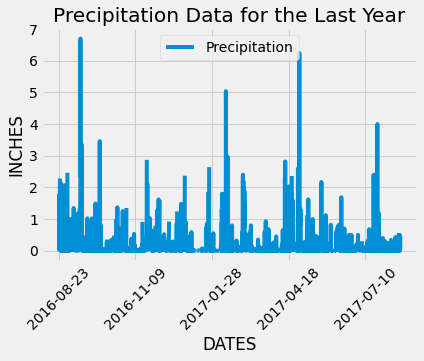

In [19]:
# Use Pandas Plotting with Matplotlib to plot the data

precip_results_df.plot(rot=45)
plt.xlabel('DATES')
plt.ylabel('INCHES')
plt.title('Precipitation Data for the Last Year')
plt.show()

# plt.savefig("static/precip.png")

In [20]:
# Use Pandas to calcualte the summary statistics for the precipitation data

precip_results_df.describe()

,Precipitation
count,2021.000000
mean,0.177279
std,0.461190
min,0.000000
25%,0.000000
50%,0.020000
75%,0.130000
max,6.700000


-----------------------------------------------------------

STATION ANALYSIS: 
* Design a query to calculate the total number of stations.
* Design a query to find the most active stations.
    - List the stations and observation counts in descending order.
    - Which station has the highest number of observations?
    - Hint: You will need to use a function such as func.min, func.max, func.avg, and func.count in your queries.

* Design a query to retrieve the last 12 months of temperature observation data (TOBS).
    - Filter by the station with the highest number of observations.
    - Plot the results as a histogram with bins=12.

In [21]:
# Design a query to show how many stations are available in this dataset?

station_count = session.query(func.count(Station.id)).all()
station_count



[(9)]

In [22]:
# What are the most active stations? (i.e. what stations have the most rows)?
# List the stations and the counts in descending order.

stations_active = session.query(Measurement.station,func.count(Measurement.station)).\
group_by(Measurement.station).order_by(func.count(Measurement.station).desc()).all()
stations_active 

[('USC00519281', 2772),
 ('USC00519397', 2724),
 ('USC00513117', 2709),
 ('USC00519523', 2669),
 ('USC00516128', 2612),
 ('USC00514830', 2202),
 ('USC00511918', 1979),
 ('USC00517948', 1372),
 ('USC00518838', 511)]

In [23]:
# Using the station id from the previous query, calculate the lowest temperature recorded, 
# highest temperature recorded, and average temperature of the most active station?

# most active station is 'USC00519281'
# station_USC00519281 = session.query(Measurement.tobs).filter(Measurement.station == 'USC00519281').all()

#Lowest temp
min_temp=session.query(func.min(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

#Highest temp
max_temp=session.query(func.max(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

#Average temp
avg_temp=session.query(func.avg(Measurement.tobs)).filter(Measurement.station == 'USC00519281').all()

print(f'The lowest temperature recorded for the most active station is {min_temp[0][0]}°F')
print(f'The highest temperature recorded for the most active station is {max_temp[0][0]}°F')
print(f'The average temperature for the most active station is {round(avg_temp[0][0],1)}°F')



The lowest temperature recorded for the most active station is 54.0°F
The highest temperature recorded for the most active station is 85.0°F
The average temperature for the most active station is 71.7°F


In [24]:
# Choose the station with the highest number of temperature observations.
# Query the last 12 months of temperature observation data for this station and plot the results as a histogram



station_data_USC00519281 = session.query(Measurement.date,Measurement.tobs).\
                    filter(Measurement.station == 'USC00519281').\
                    filter(Measurement.date >=  last_year_date).all()

station_data_USC00519281_df = pd.DataFrame(station_data_USC00519281)
station_data_USC00519281_df = station_data_USC00519281_df.set_index('date').sort_index(ascending=True)
station_data_USC00519281_df

,tobs
date,
2016-08-23,77.0
2016-08-24,77.0
2016-08-25,80.0
2016-08-26,80.0
2016-08-27,75.0
...,...
2017-08-14,77.0
2017-08-15,77.0
2017-08-16,76.0


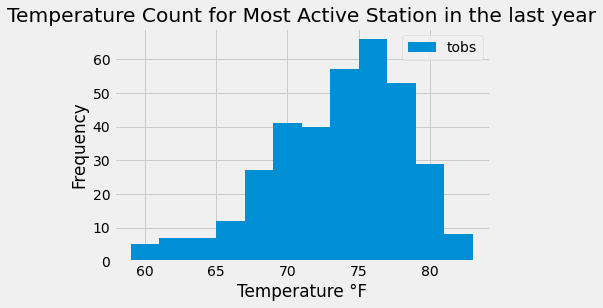

In [25]:
station_data_USC00519281_df.plot(kind = "hist", bins=12)
plt.xlabel('Temperature °F')
plt.ylabel('Frequency')
plt.title(f'Temperature Count for Most Active Station in the last year')
plt.show()
# plt.savefig("static/USC00519281.png")

## Bonus Challenge Assignment (OPTIONAL)

In [68]:
# This function called `calc_temps` will accept start date and end date in the format '%Y-%m-%d' 
# and return the minimum, average, and maximum temperatures for that range of dates
def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

# function usage example
print(calc_temps('2012-02-28', '2012-03-05'))

[(62.0, 69.57142857142857, 74.0)]


In [69]:
# Use your previous function `calc_temps` to calculate the tmin, tavg, and tmax 
# for your trip using the previous year's data for those same dates.

def calc_temps(start_date, end_date):
    """TMIN, TAVG, and TMAX for a list of dates.
    
    Args:
        start_date (string): A date string in the format %Y-%m-%d
        end_date (string): A date string in the format %Y-%m-%d
        
    Returns:
        TMIN, TAVE, and TMAX
    """
    
    return session.query(func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)).\
        filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).all()

#  TRIP Start and End Date for January 1, 2017 and January 7, 2017

print(calc_temps('2017-01-01', '2017-01-07'))


[(62.0, 68.36585365853658, 74.0)]


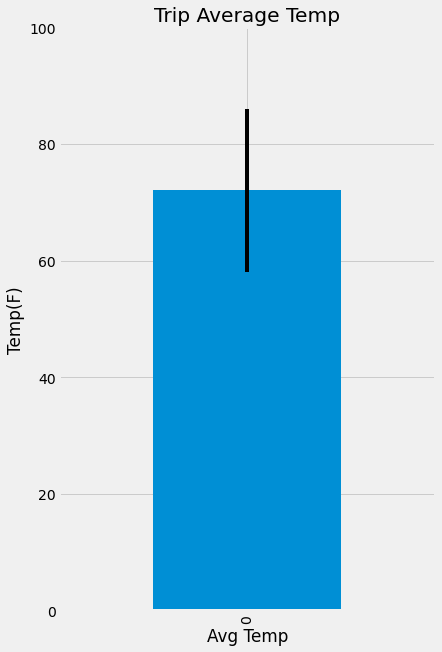

In [118]:
# Plot the results from your previous query as a bar chart. 
# Use "Trip Avg Temp" as your Title
# Use the average temperature for the y value
# Use the peak-to-peak (tmax-tmin) value as the y error bar (yerr)

# dataframe
df = pd.DataFrame(temps, columns=["TMIN", "TAVG", "TMAX"])

# plot 
plt.figure(figsize=(6,10))
ax=df["TAVG"].plot.bar(yerr=(df["TMAX"]-df["TMIN"]))
plt.title("Trip Average Temp")
plt.ylabel("Temp(F)")
plt.ylim(0,100);
plt.xlabel("Avg Temp")
plt.show()

In [121]:
# Calculate the total amount of rainfall per weather station for your trip dates using the previous year's matching dates.
# Sort this in descending order by precipitation amount and list the station, name, latitude, longitude, and elevation

#  TRIP Start and End Date for January 1, 2017 and January 7, 2017
start_date = '2017-01-01'
end_date = '2017-01-07'

sel = [func.count(Measurement.prcp),Measurement.station, Station.name, Station.latitude, Station.longitude,Station.elevation]
rainfall=session.query(*sel).filter(Measurement.station==Station.station).\
    group_by(Measurement.station).\
    filter(Measurement.date >= start_date).filter(Measurement.date <= end_date).\
    order_by(func.count(Measurement.prcp).desc()).all()
for r in rainfall:
    print(r)

(7, 'USC00519397', 'WAIKIKI 717.2, HI US', 21.2716, -157.8168, 3.0)
(7, 'USC00519281', 'WAIHEE 837.5, HI US', 21.45167, -157.84888999999998, 32.9)
(7, 'USC00516128', 'MANOA LYON ARBO 785.2, HI US', 21.3331, -157.8025, 152.4)
(7, 'USC00514830', 'KUALOA RANCH HEADQUARTERS 886.9, HI US', 21.5213, -157.8374, 7.0)
(7, 'USC00513117', 'KANEOHE 838.1, HI US', 21.4234, -157.8015, 14.6)
(4, 'USC00519523', 'WAIMANALO EXPERIMENTAL FARM, HI US', 21.33556, -157.71139, 19.5)


In [72]:
# Create a query that will calculate the daily normals 
# (i.e. the averages for tmin, tmax, and tavg for all historic data matching a specific month and day)

def daily_normals(date):
    """Daily Normals.
    
    Args:
        date (str): A date string in the format '%m-%d'
        
    Returns:
        A list of tuples containing the daily normals, tmin, tavg, and tmax
    
    """
    
    sel = [func.min(Measurement.tobs), func.avg(Measurement.tobs), func.max(Measurement.tobs)]
    return session.query(*sel).filter(func.strftime("%m-%d", Measurement.date) == date).all()
    
daily_normals("01-01")

[(62.0, 69.15384615384616, 77.0)]

In [88]:
# calculate the daily normals for your trip
#  TRIP Start and End Date for January 1, 2017 and January 7, 2017

# push each tuple of calculations into a list called `normals`

normals =[]

# Set the start and end date of the trip

start_date = '2017-01-01'
end_date = '2017-01-07'

# Use the start and end date to create a range of dates

start_end_dates =['2017-01-01', '2017-01-02', '2017-01-03', '2017-01-04', '2017-01-05', '2017-01-06', '2017-01-07']

trip_dates =[dt.datetime.strptime(date, "%Y-%m-%d") for date in start_end_dates]


# Stip off the year and save a list of %m-%d strings

month_day_list = [date.strftime("%m-%d") for date in trip_dates]


# Loop through the list of %m-%d strings and calculate the normals for each date


normals = [daily_normals(date) for date in month_day_list]

# converting "normals" to a list 
normals_list = [item for sublist in normals for item in sublist]
normals_list

[(62.0, 69.15384615384616, 77.0),
 (60.0, 69.39622641509433, 77.0),
 (62.0, 68.9090909090909, 77.0),
 (58.0, 70.0, 76.0),
 (56.0, 67.96428571428571, 76.0),
 (61.0, 68.96491228070175, 76.0),
 (57.0, 68.54385964912281, 76.0)]

In [89]:
# Load the previous query results into a Pandas DataFrame and add the `trip_dates` range as the `date` index

normals_df = pd.DataFrame(normals_list,index=start_end_dates,columns=["TMIN","TAVG", "TMAX"])
normals_df.index.name="DATE"
normals_df

,TMIN,TAVG,TMAX
DATE,,,
2017-01-01,62.0,69.153846,77.0
2017-01-02,60.0,69.396226,77.0
2017-01-03,62.0,68.909091,77.0
2017-01-04,58.0,70.000000,76.0
2017-01-05,56.0,67.964286,76.0
2017-01-06,61.0,68.964912,76.0
2017-01-07,57.0,68.543860,76.0


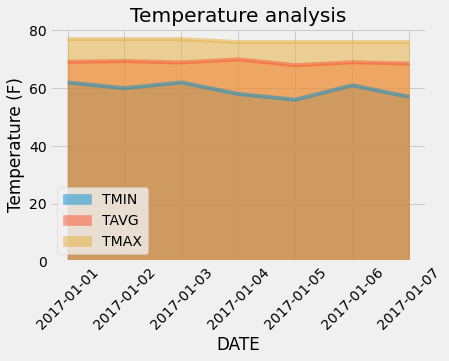

In [103]:
# Plot the daily normals as an area plot with `stacked=False`

normals_df.plot.area(stacked=False)
plt.xticks(rotation=45)
plt.title('Temperature analysis')
plt.ylabel('Temperature (F)')
plt.show()